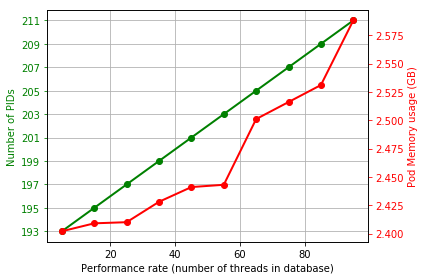

In [3]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
X1= [1.93000000e+02,1.95000000e+02,1.97000000e+02,1.99000000e+02,2.01000000e+02,2.03000000e+02,2.05000000e+02,2.07000000e+02,2.09000000e+02,2.11000000e+02]
X2= [2.402,2.409,2.410,2.428,2.441,2.443,2.501,2.516,2.531,2.588]
Y= [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
ax1.plot(Y,X1,'go-', linewidth=2)
ax1.set_xlabel('Performance rate (number of threads in database)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of PIDs', color='g')
ax1.tick_params('y', colors='g')
ax1.set_yticks(X1)
plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(Y,X2,'ro-', linewidth=2)
ax2.set_ylabel('Pod Memory usage (GB)', color='r')
ax2.tick_params('y', colors='r')
#%plt.grid(True)
fig.tight_layout()

plt.show()

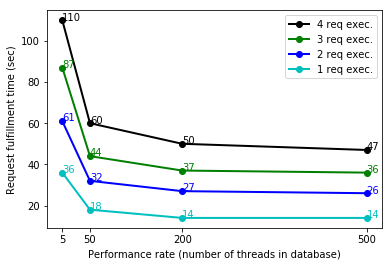

In [4]:
#50 threads >  4 stress-read each reading 100000 rows >  execution time = 1 minute for each
#50 threads >  3 stress-read each reading 100000 rows >  execution time = 44 sec for each
#50 threads >  2 stress-read each reading 100000 rows >  execution time = 32 sec for each
#50 threads >  1 stress-read each reading 100000 rows >  execution time = 18 sec for each

#5 threads >  4 stress-read each reading 100000 rows >  execution time = 1min 50sec for each
#5 threads >  3 stress-read each reading 100000 rows >  execution time = 1min 27sec for each
#5 threads >  2 stress-read each reading 100000 rows >  execution time = 1min 1sec for each
#5 threads >  1 stress-read each reading 100000 rows >  execution time = 36 sec for each

#200 threads >  4 stress-read each reading 100000 rows >  execution time = 50sec for each
#200 threads >  3 stress-read each reading 100000 rows >  execution time = 37sec for each
#200 threads >  2 stress-read each reading 100000 rows >  execution time = 27sec for each
#200 threads >  1 stress-read each reading 100000 rows >  execution time =  14sec for each

#500 threads >  4 stress-read each reading 100000 rows >  execution time = 47sec for each
#500 threads >  3 stress-read each reading 100000 rows >  execution time = 36sec for each
#500 threads >  2 stress-read each reading 100000 rows >  execution time = 26sec for each
#500 threads >  1 stress-read each reading 100000 rows >  execution time =  14sec for each

threads = [5, 50, 200, 500]
execution4 = [110, 60, 50, 47]
execution3 = [87, 44, 37, 36]
execution2 = [61, 32, 27, 26]
execution1 = [36, 18, 14, 14]
X = [1,2,3,4]
fig, ax1 = plt.subplots()
ax1.plot(threads,execution4,'ko-', linewidth=2, label = '4 req exec.')
ax1.plot(threads,execution3,'go-', linewidth=2, label = '3 req exec.')
ax1.plot(threads,execution2,'bo-', linewidth=2, label = '2 req exec.')
ax1.plot(threads,execution1,'co-', linewidth=2, label = '1 req exec.')
ax1.set_xlabel('Performance rate (number of threads in database)')
ax1.set_ylabel('Request fulfillment time (sec)')
plt.xticks(threads)

for i,j in zip(threads,execution1):
    ax1.annotate(str(j),xy=(i,j), color='c')
    
for i,j in zip(threads,execution2):
    ax1.annotate(str(j),xy=(i,j), color='b')
    
for i,j in zip(threads,execution3):
    ax1.annotate(str(j),xy=(i,j), color='g')
    
for i,j in zip(threads,execution4):
    ax1.annotate(str(j),xy=(i,j), color='k')


#ax2 = ax1.twinx()
#ax2.plot(X,threads,'ro-', linewidth=2)
#ax2.set_ylabel('Performance rate', color='r')
#ax2.tick_params(colors='r')
ax1.legend()
#for i,j in zip(X,threads):
#    ax2.annotate(str(j),xy=(i,j))

plt.show()

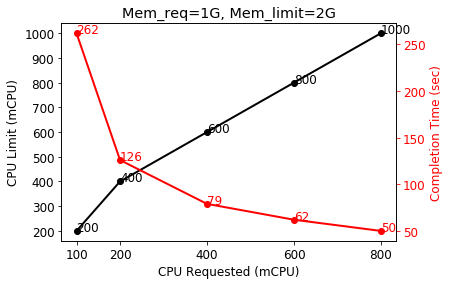

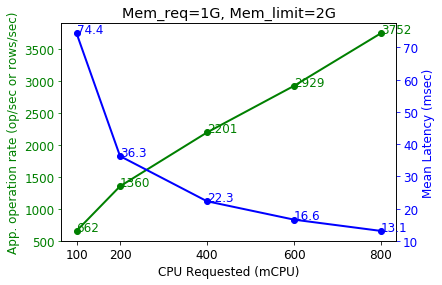

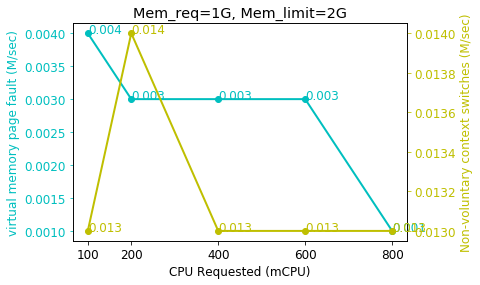

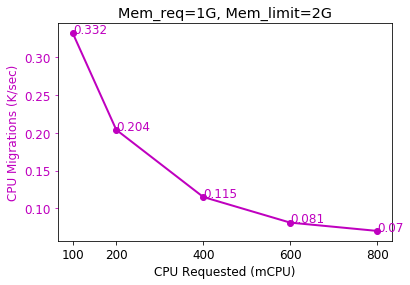

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

req_C=[100, 200, 400, 600, 800]
limit_C=[200,400,600,800,1000]
req_M=[1,1,1,1,1]
limit_M=[2,2,2,2,2]
app_op_rate=[662, 1360, 2201, 2929, 3752]
mean_latency = [74.4, 36.3, 22.3, 16.6, 13.1]
exec_time = [262, 126, 79, 62, 50]
page_fault = [0.004, 0.003, 0.003, 0.003, 0.001]
context_switches = [0.013, 0.014, 0.013, 0.013,0.013]
cpu_migrations=[0.332, 0.204, 0.115, 0.081, 0.070]

fig, ax1 = plt.subplots()
ax1.plot(req_C,limit_C,'ko-', linewidth=2)
ax1.set_xlabel('CPU Requested (mCPU)')
ax1.set_ylabel('CPU Limit (mCPU)')
plt.xticks(req_C)
for i,j in zip(req_C,limit_C):
    ax1.annotate(str(j),xy=(i,j),color='k')
ax2 = ax1.twinx()
ax2.plot(req_C,exec_time,'ro-', linewidth=2)
ax2.set_ylabel('Completion Time (sec)', color='r')
ax2.tick_params(colors='r')
ax1.legend()
for i,j in zip(req_C,exec_time):
    ax2.annotate(str(j),xy=(i,j),color='r')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Mem_req=1G, Mem_limit=2G')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(req_C,app_op_rate,'go-', linewidth=2)
ax1.set_xlabel('CPU Requested (mCPU)')
ax1.set_ylabel('App. operation rate (op/sec or rows/sec)', color='g')
plt.xticks(req_C)
ax1.tick_params(axis='y', colors='g')
for i,j in zip(req_C,app_op_rate):
    ax1.annotate(str(j),xy=(i,j),color='g')
ax2 = ax1.twinx()
ax2.plot(req_C,mean_latency,'bo-', linewidth=2)
ax2.set_ylabel('Mean Latency (msec)', color='b')
ax2.tick_params(colors='b')
ax1.legend()
for i,j in zip(req_C,mean_latency):
    ax2.annotate(str(j),xy=(i,j),color='b')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Mem_req=1G, Mem_limit=2G')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(req_C,page_fault,'co-', linewidth=2)
ax1.set_xlabel('CPU Requested (mCPU)')
ax1.set_ylabel('virtual memory page fault (M/sec)', color='c')
plt.xticks(req_C)
ax1.tick_params(axis='y', colors='c')
for i,j in zip(req_C,page_fault):
    ax1.annotate(str(j),xy=(i,j),color='c')
ax2 = ax1.twinx()
ax2.plot(req_C,context_switches,'yo-', linewidth=2)
ax2.set_ylabel('Non-voluntary context switches (M/sec)', color='y')
ax2.tick_params(colors='y')
ax1.legend()
for i,j in zip(req_C,context_switches):
    ax2.annotate(str(j),xy=(i,j),color='y')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Mem_req=1G, Mem_limit=2G')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(req_C,cpu_migrations,'mo-', linewidth=2)
ax1.set_xlabel('CPU Requested (mCPU)')
ax1.set_ylabel('CPU Migrations (K/sec)', color='m')
plt.xticks(req_C)
ax1.tick_params(axis='y', colors='m')
for i,j in zip(req_C,cpu_migrations):
    ax1.annotate(str(j),xy=(i,j),color='m')
plt.title('Mem_req=1G, Mem_limit=2G')
plt.show()

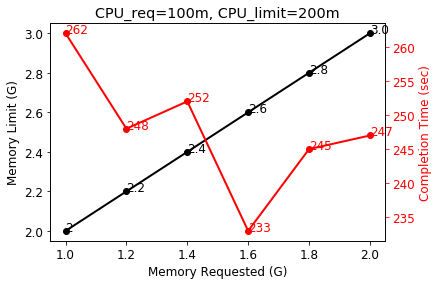

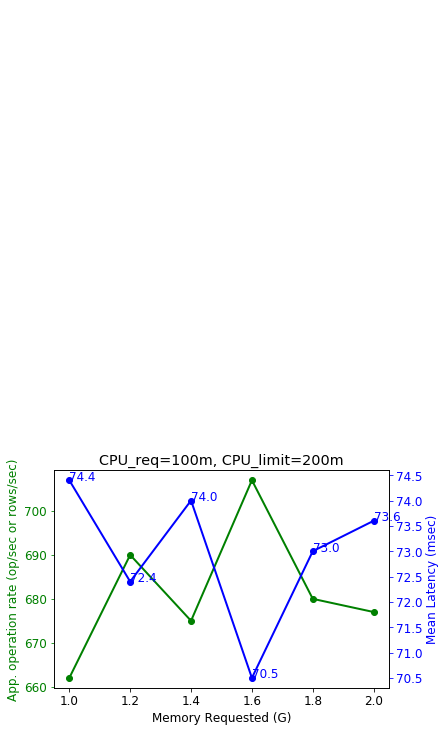

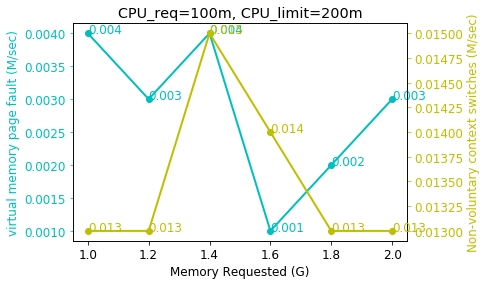

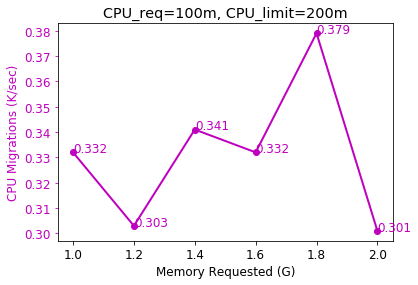

In [6]:
req_C=[100, 100, 100, 100, 100, 100]
limit_C=[200, 200, 200, 200, 200, 200]
req_M=[1, 1.2, 1.4, 1.6, 1.8, 2.0]
limit_M=[2, 2.2, 2.4, 2.6, 2.8, 3.0]
app_op_rate=[662, 690, 675, 707, 680, 677]
mean_latency = [74.4, 72.4, 74.0, 70.5, 73.0, 73.6]
exec_time = [262, 248, 252, 233, 245, 247]
page_fault = [0.004, 0.003, 0.004, 0.001, 0.002, 0.003]
context_switches = [0.013, 0.013, 0.015, 0.014, 0.013, 0.013]
cpu_migrations=[0.332, 0.303, 0.341, 0.332, 0.379, 0.301]

fig, ax1 = plt.subplots()
ax1.plot(req_M,limit_M,'ko-', linewidth=2)
ax1.set_xlabel('Memory Requested (G)')
ax1.set_ylabel('Memory Limit (G)')
plt.xticks(req_M)
for i,j in zip(req_M,limit_M):
    ax1.annotate(str(j),xy=(i,j),color='k')
ax2 = ax1.twinx()
ax2.plot(req_M,exec_time,'ro-', linewidth=2)
ax2.set_ylabel('Completion Time (sec)', color='r')
ax2.tick_params(colors='r')
ax1.legend()
for i,j in zip(req_M,exec_time):
    ax2.annotate(str(j),xy=(i,j),color='r')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('CPU_req=100m, CPU_limit=200m')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(req_M,app_op_rate,'go-', linewidth=2)
ax1.set_xlabel('Memory Requested (G)')
ax1.set_ylabel('App. operation rate (op/sec or rows/sec)', color='g')
plt.xticks(req_M)
ax1.tick_params(axis='y', colors='g')
for i,j in zip(req_C,app_op_rate):
    ax1.annotate(str(j),xy=(i,j),color='g')
ax2 = ax1.twinx()
ax2.plot(req_M,mean_latency,'bo-', linewidth=2)
ax2.set_ylabel('Mean Latency (msec)', color='b')
ax2.tick_params(colors='b')
ax1.legend()
for i,j in zip(req_M,mean_latency):
    ax2.annotate(str(j),xy=(i,j),color='b')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('CPU_req=100m, CPU_limit=200m')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(req_M,page_fault,'co-', linewidth=2)
ax1.set_xlabel('Memory Requested (G)')
ax1.set_ylabel('virtual memory page fault (M/sec)', color='c')
plt.xticks(req_M)
ax1.tick_params(axis='y', colors='c')
for i,j in zip(req_M,page_fault):
    ax1.annotate(str(j),xy=(i,j),color='c')
ax2 = ax1.twinx()
ax2.plot(req_M,context_switches,'yo-', linewidth=2)
ax2.set_ylabel('Non-voluntary context switches (M/sec)', color='y')
ax2.tick_params(colors='y')
ax1.legend()
for i,j in zip(req_M,context_switches):
    ax2.annotate(str(j),xy=(i,j),color='y')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('CPU_req=100m, CPU_limit=200m')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(req_M,cpu_migrations,'mo-', linewidth=2)
ax1.set_xlabel('Memory Requested (G)')
ax1.set_ylabel('CPU Migrations (K/sec)', color='m')
plt.xticks(req_M)
ax1.tick_params(axis='y', colors='m')
for i,j in zip(req_M,cpu_migrations):
    ax1.annotate(str(j),xy=(i,j),color='m')
plt.title('CPU_req=100m, CPU_limit=200m')
plt.show()

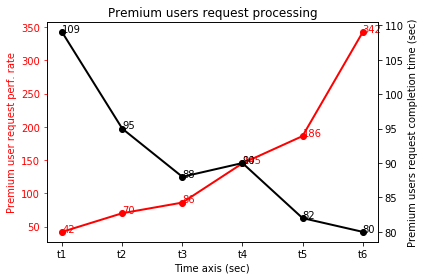

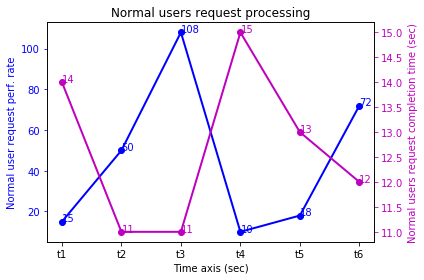

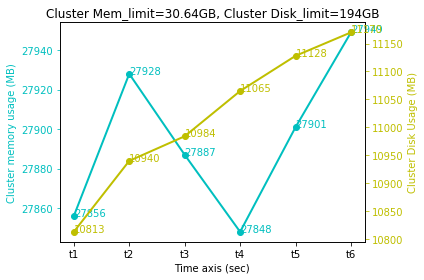

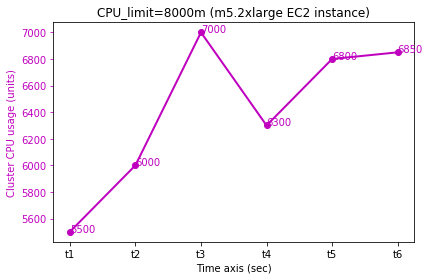

In [3]:
from matplotlib import pyplot as plt
Premium_users_req = [42, 70, 86, 145, 186, 342 ]
Normal_users_req = [15, 50, 108, 10, 18, 72]
Premmium_user_req_completion_time = [109, 95, 88, 90, 82, 80]
Normal_user_req_completion_time = [14, 11, 11, 15, 13, 12]
Mem = [27856, 27928, 27887, 27848, 27901, 27949]
Disk = [10813, 10940, 10984, 11065, 11128, 11170]
CPU = [5500, 6000, 7000, 6300, 6800, 6850]
x_axis = range(1,len(Premium_users_req)+1)

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Premium_users_req,'ro-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Premium user request perf. rate', color='r')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='r')
for i,j in zip(x_axis,Premium_users_req):
    ax1.annotate(str(j),xy=(i,j), color='r')
ax2 = ax1.twinx()
ax2.plot(x_axis,Premmium_user_req_completion_time,'ko-', linewidth=2)
ax2.set_ylabel('Premium users request completion time (sec)', color='k')
ax2.tick_params(colors='k')
ax1.legend()
for i,j in zip(x_axis,Premmium_user_req_completion_time):
    ax2.annotate(str(j),xy=(i,j),color='k')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Premium users request processing')
plt.tight_layout()
plt.savefig('premium-user-req-healthy-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Normal_users_req,'bo-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Normal user request perf. rate',color='b')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='b')
for i,j in zip(x_axis,Normal_users_req):
    ax1.annotate(str(j),xy=(i,j), color='b')
ax2 = ax1.twinx()
ax2.plot(x_axis,Normal_user_req_completion_time,'mo-', linewidth=2)
ax2.set_ylabel('Normal users request completion time (sec)', color='m')
ax2.tick_params(colors='m')
ax1.legend()
for i,j in zip(x_axis,Normal_user_req_completion_time):
    ax2.annotate(str(j),xy=(i,j), color='m')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Normal users request processing')
plt.tight_layout()
plt.savefig('normal-user-req-healthy-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Mem,'co-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Cluster memory usage (MB)', color='c')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='c')
for i,j in zip(x_axis,Mem):
    ax1.annotate(str(j),xy=(i,j), color='c')
ax2 = ax1.twinx()
ax2.plot(x_axis,Disk,'yo-', linewidth=2)
ax2.set_ylabel('Cluster Disk Usage (MB)', color='y')
ax2.tick_params(colors='y')
ax1.legend()
for i,j in zip(x_axis,Disk):
    ax2.annotate(str(j),xy=(i,j), color='y')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Cluster Mem_limit=30.64GB, Cluster Disk_limit=194GB')
plt.tight_layout()
plt.savefig('cluster-resource-usage-healthy-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,CPU,'mo-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Cluster CPU usage (units)', color='m')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='m')
for i,j in zip(x_axis,CPU):
    ax1.annotate(str(j),xy=(i,j), color='m')
plt.title('CPU_limit=8000m (m5.2xlarge EC2 instance)')
plt.tight_layout()
plt.savefig('cluster-resource-cpu-usage-healthy-case.pdf')
plt.show()

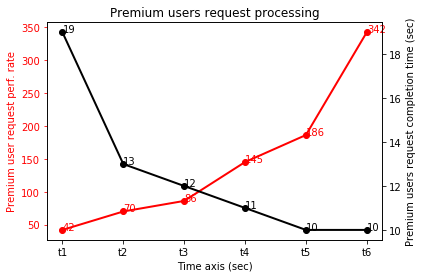

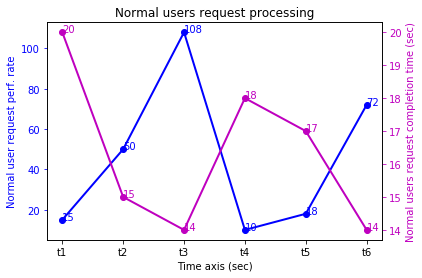

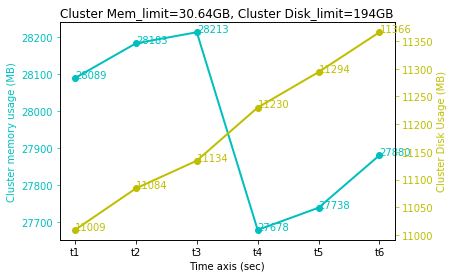

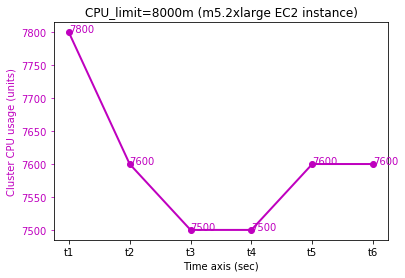

In [31]:
from matplotlib import pyplot as plt
Premium_users_req = [42, 70, 86, 145, 186, 342 ]
Normal_users_req = [15, 50, 108, 10, 18, 72]
Premmium_user_req_completion_time = [19, 13, 12, 11, 10, 10]
Normal_user_req_completion_time = [20, 15, 14, 18, 17, 14]
Mem = [28089, 28183, 28213, 27678, 27738, 27880]
Disk = [11009, 11084, 11134, 11230, 11294, 11366]
CPU = [7800, 7600, 7500, 7500, 7600, 7600]
x_axis = range(1,len(Premium_users_req)+1)

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Premium_users_req,'ro-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Premium user request perf. rate', color='r')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='r')
for i,j in zip(x_axis,Premium_users_req):
    ax1.annotate(str(j),xy=(i,j), color='r')
ax2 = ax1.twinx()
ax2.plot(x_axis,Premmium_user_req_completion_time,'ko-', linewidth=2)
ax2.set_ylabel('Premium users request completion time (sec)', color='k')
ax2.tick_params(colors='k')
ax1.legend()
for i,j in zip(x_axis,Premmium_user_req_completion_time):
    ax2.annotate(str(j),xy=(i,j),color='k')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Premium users request processing')
plt.savefig('premium-user-intelligent_orchestration-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Normal_users_req,'bo-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Normal user request perf. rate',color='b')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='b')
for i,j in zip(x_axis,Normal_users_req):
    ax1.annotate(str(j),xy=(i,j), color='b')
ax2 = ax1.twinx()
ax2.plot(x_axis,Normal_user_req_completion_time,'mo-', linewidth=2)
ax2.set_ylabel('Normal users request completion time (sec)', color='m')
ax2.tick_params(colors='m')
ax1.legend()
for i,j in zip(x_axis,Normal_user_req_completion_time):
    ax2.annotate(str(j),xy=(i,j), color='m')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Normal users request processing')
plt.savefig('normal-user-req-intelligent_orchestration-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Mem,'co-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Cluster memory usage (MB)', color='c')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='c')
for i,j in zip(x_axis,Mem):
    ax1.annotate(str(j),xy=(i,j), color='c')
ax2 = ax1.twinx()
ax2.plot(x_axis,Disk,'yo-', linewidth=2)
ax2.set_ylabel('Cluster Disk Usage (MB)', color='y')
ax2.tick_params(colors='y')
ax1.legend()
for i,j in zip(x_axis,Disk):
    ax2.annotate(str(j),xy=(i,j), color='y')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Cluster Mem_limit=30.64GB, Cluster Disk_limit=194GB')
plt.savefig('cluster-resource-usage-intelligent_orchestration-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,CPU,'mo-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Cluster CPU usage (units)', color='m')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='m')
for i,j in zip(x_axis,CPU):
    ax1.annotate(str(j),xy=(i,j), color='m')
plt.title('CPU_limit=8000m (m5.2xlarge EC2 instance)')
plt.savefig('cluster-resource-cpu-usage-intelligent_orchestration-case.pdf')
plt.show()

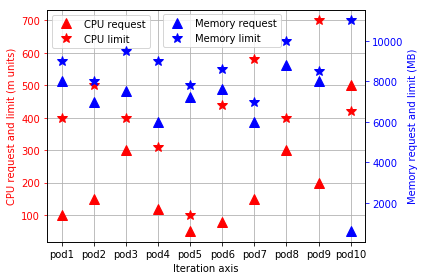

In [79]:
from matplotlib import pyplot as plt
CPU_req=[100,150,300,120,50,80,150,300,200,500]
CPU_lim=[400,500,400,310,100,440,580,400,700,420]
Mem_req=[8000,7000,7500,6000,7200,7600,6000, 8800,8000,600]
Mem_lim=[9000,8000,9500,9000,7800,8600,7000,10000,8500,11000]
LS_T_completion = [83, 95, 200, 63, 76, 52]
FS_T_completion = [83, 95, 200, 63, 76, 52, 76, 44, 20, 45]
x_axis = range(1,len(CPU_req)+1)

fig, ax1 = plt.subplots()
ax1.plot(x_axis,CPU_req,'r^', ms=10, label='CPU request')
ax1.plot(x_axis,CPU_lim,'r*', ms=10, label='CPU limit')
plt.grid(True)
ax1.set_xlabel('Iteration axis')
ax1.set_ylabel('CPU request and limit (m units)', color='r')
plt.xticks(x_axis, ['pod1', 'pod2', 'pod3', 'pod4', 'pod5', 'pod6', 'pod7', 'pod8', 'pod9', 'pod10'])
ax1.tick_params(axis='y', colors='r')
#for i,j in zip(x_axis,CPU_req):
#    ax1.annotate(str(j),xy=(i,j), color='r')
#for i,j in zip(x_axis,CPU_lim):
#    ax1.annotate(str(j),xy=(i,j), color='r')
ax2 = ax1.twinx()
ax2.plot(x_axis,Mem_req,'b^', ms=10, label='Memory request')
ax2.plot(x_axis,Mem_lim,'b*', ms=10, label='Memory limit')
ax2.set_ylabel('Memory request and limit (MB)', color='b')
ax2.tick_params(colors='b')
#for i,j in zip(x_axis,Mem_req):
#    ax2.annotate(str(j),xy=(i,j),color='b')
#for i,j in zip(x_axis,Mem_lim):
#    ax2.annotate(str(j),xy=(i,j),color='b')
#plt.savefig('Thread-optime-multipleusers.pdf')

ax1.legend(loc='upper left')
ax2.legend(loc='center left', bbox_to_anchor=(0.35, 0.91))


#plt.title('Local Search on busrtable pods')
plt.tight_layout()
plt.savefig('localsearch-burstable.pdf')
plt.show()

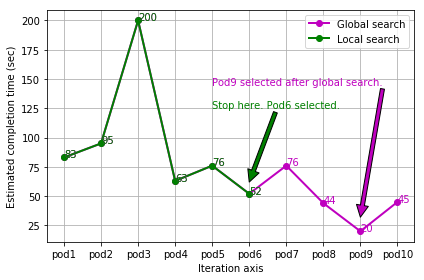

In [74]:
fig, ax1 = plt.subplots()
ax1.plot(x_axis,FS_T_completion,'mo-', linewidth=2, label='Global search')
ax1.plot(x_axis[:6],LS_T_completion,'go-', linewidth=2, label='Local search')
plt.grid(True)
ax1.set_xlabel('Iteration axis')
ax1.set_ylabel('Estimated completion time (sec)', color='k')
plt.xticks(x_axis, ['pod1', 'pod2', 'pod3', 'pod4', 'pod5', 'pod6', 'pod7', 'pod8', 'pod9', 'pod10'])
ax1.tick_params(axis='y', colors='k')

for i,j in zip(x_axis,FS_T_completion):
    ax1.annotate(str(j),xy=(i,j), color='m')
for i,j in zip(x_axis,LS_T_completion):
    ax1.annotate(str(j),xy=(i,j), color='g') 
ax1.annotate('Stop here. Pod6 selected.', xy=(6, 62), color='g',xytext=(5, 125),arrowprops=dict(facecolor='g'))

ax1.annotate('Pod9 selected after global search.', xy=(9, 32), color='m',xytext=(5, 145),arrowprops=dict(facecolor='m'))

    
ax1.legend(loc='upper right')
#plt.title('Estimate completion time')
plt.tight_layout()
plt.savefig('Completiontime-localsearch-burstable.pdf',layout='tight')
plt.show()